In [1]:
pip install leafmap

In [2]:
 %pip install segment-geospatial

In [3]:

!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install



fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [4]:
pip install rasterio

In [5]:
import os
import leafmap
from samgeo import  tms_to_geotiff
import rasterio
from rasterio.plot import show
import subprocess
import re

In [9]:
m = leafmap.Map(center=[36.9806,5.2625], zoom=9)
m.add_basemap("SATELLITE")
m

Map(center=[36.9806, 5.2625], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [10]:
bbox = m.user_roi_bounds()
bbox

[5.3335, 34.6683, 5.3361, 34.6705]

In [11]:
img_path = "/content/field.tif"
tms_to_geotiff(output=img_path, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to /content/field.tif


In [12]:
label='Palm_Treess'

In [13]:

yolo_command = [
    "python",
    "/content/yolov5/detect.py",
    "--weights",
    "/content/drive/MyDrive/palm/best.pt",
    "--img",
    "640",
    "--conf",
    "0.25",
    "--source",
    img_path
]

output = subprocess.check_output(yolo_command, text=True, stderr=subprocess.STDOUT)
result_lines = output.split('\n')
total_count = 0
for line in result_lines:
    match = re.search(rf"(\d+) {label}", line)
    if match:
        number_of_palms = int(match.group(1))
        total_count += number_of_palms

print(f"Total number of palms detected: {total_count}")


Total number of palms detected: 782


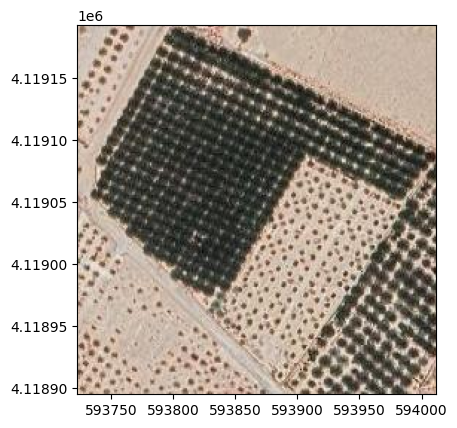

<Axes: >

In [14]:
img=rasterio.open('/content/field.tif')
show(img)

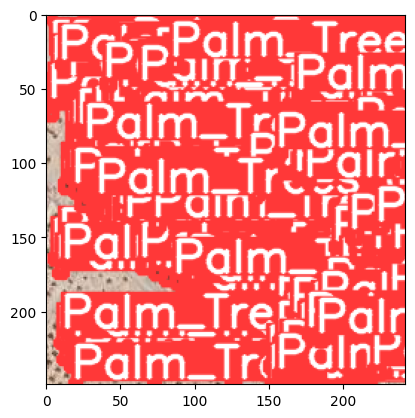

<Axes: >

In [15]:
img2=rasterio.open('/content/yolov5/runs/detect/exp5/field.tif')
show(img2)